## Rain Gage Location workbook

In [1]:
import sys
import os
import pathlib as pl
sys.path.append('..')
home = pl.Path(os.getcwd())

In [9]:

from src.core import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get rain gages within HUC basin

In [3]:
#user defined
huc = '210200010203'
stormwater_capacity = 0 #inches
if not os.path.exists(home/'output'/huc):
    os.makedirs(home/'output'/huc)
#write to txt file for later notebooks
with open(home/'output'/'huc.txt','w') as tfile:
    tfile.write(huc)
input_dir = home/'input'/huc
if not os.path.exists(input_dir):
    os.makedirs(input_dir)

### check for gage within huc12

In [4]:
hucs_gdf = get_huc_12_gdf_from_bigger_huc(huc)
bounds = get_huc_12_bounds(huc)

obtaining huc12 basin information
obtaining huc12 basin information


## Get list of nearest rain gages within HUC area

In [13]:
search = 10 #meters
sr = hucs_gdf.crs.to_epsg()
rain_gage_gdf = gdf_of_local_precip_gages(bounds,sr,search)

Found gages nearby


In [14]:
rain_gage_gdf

,attributes,geometry,STATION_ID,STATION_NAME,DATA_BEGIN_DATE,DATA_END_DATE,lat,long
0,"{'STATION_ID': 'GHCND:VQC00671980', 'STATION_N...",POINT (-64.7941 18.3347),GHCND:VQC00671980,"CRUZ BAY, US",1972-01-01,2026-01-12 23:59:59,18.334700,-64.794100
1,"{'STATION_ID': 'GHCND:VQC00671316', 'STATION_N...",POINT (-64.78672 18.34355),GHCND:VQC00671316,"CANEEL BAY PLANTATION, US",1972-01-01,1998-02-28 23:59:59,18.343550,-64.786720
2,"{'STATION_ID': 'GHCND:VQ1VISJ0004', 'STATION_N...",POINT (-64.7731 18.33082),GHCND:VQ1VISJ0004,"CRUZ BAY 0.8 NE, US",2020-06-02,2025-08-05 23:59:59,18.330818,-64.773104
3,"{'STATION_ID': 'GHCND:VQC00671348', 'STATION_N...",POINT (-64.76056 18.34528),GHCND:VQC00671348,"CATHERINEBURG, US",1972-01-01,1996-11-30 23:59:59,18.345280,-64.760560
4,"{'STATION_ID': 'GHCND:VQ1VISJ0005', 'STATION_N...",POINT (-64.75756 18.32408),GHCND:VQ1VISJ0005,"CRUZ BAY 1.6 E, US",2020-06-12,2026-01-09 23:59:59,18.324080,-64.757555
5,"{'STATION_ID': 'GHCND:VQC00670820', 'STATION_N...",POINT (-64.73333 18.33333),GHCND:VQC00670820,"BORDEAUX MOUNTAIN, US",1972-01-01,1984-07-31 23:59:59,18.333330,-64.733330
6,"{'STATION_ID': 'GHCND:VQC00674820', 'STATION_N...",POINT (-64.73333 18.31667),GHCND:VQC00674820,"LAMESHUR BAY, US",1972-01-01,1989-03-29 23:59:59,18.316670,-64.733330


### check for gage within a search distance if not within huc12

In [6]:
#search distance
distancez_increment = 1000 #meters
search+=distancez_increment
rain_gage_gdf = gdf_of_local_precip_gages(bounds,sr,search)


Found gages nearby


### Plot results for visuals and pertinent gage table information

In [15]:
rain_gage_gdf = add_to_gage(rain_gage_gdf)

<string>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [17]:
#show rain gage info and rerun with larger search distance if needed
rain_gage_gdf.loc[rain_gage_gdf['link_works']=='yes'][['STATION_ID','STATION_NAME','DATA_BEGIN_DATE','DATA_END_DATE','Period of Record']].sort_values('Period of Record',ascending=False)

,STATION_ID,STATION_NAME,DATA_BEGIN_DATE,DATA_END_DATE,Period of Record
0,GHCND:VQC00671980,"CRUZ BAY, US",1972-01-01,2026-01-12 23:59:59,54.031485
1,GHCND:VQC00671316,"CANEEL BAY PLANTATION, US",1972-01-01,1998-02-28 23:59:59,26.160164
3,GHCND:VQC00671348,"CATHERINEBURG, US",1972-01-01,1996-11-30 23:59:59,24.914442
6,GHCND:VQC00674820,"LAMESHUR BAY, US",1972-01-01,1989-03-29 23:59:59,17.240246
5,GHCND:VQC00670820,"BORDEAUX MOUNTAIN, US",1972-01-01,1984-07-31 23:59:59,12.580424
4,GHCND:VQ1VISJ0005,"CRUZ BAY 1.6 E, US",2020-06-12,2026-01-09 23:59:59,5.577002
2,GHCND:VQ1VISJ0004,"CRUZ BAY 0.8 NE, US",2020-06-02,2025-08-05 23:59:59,5.174538


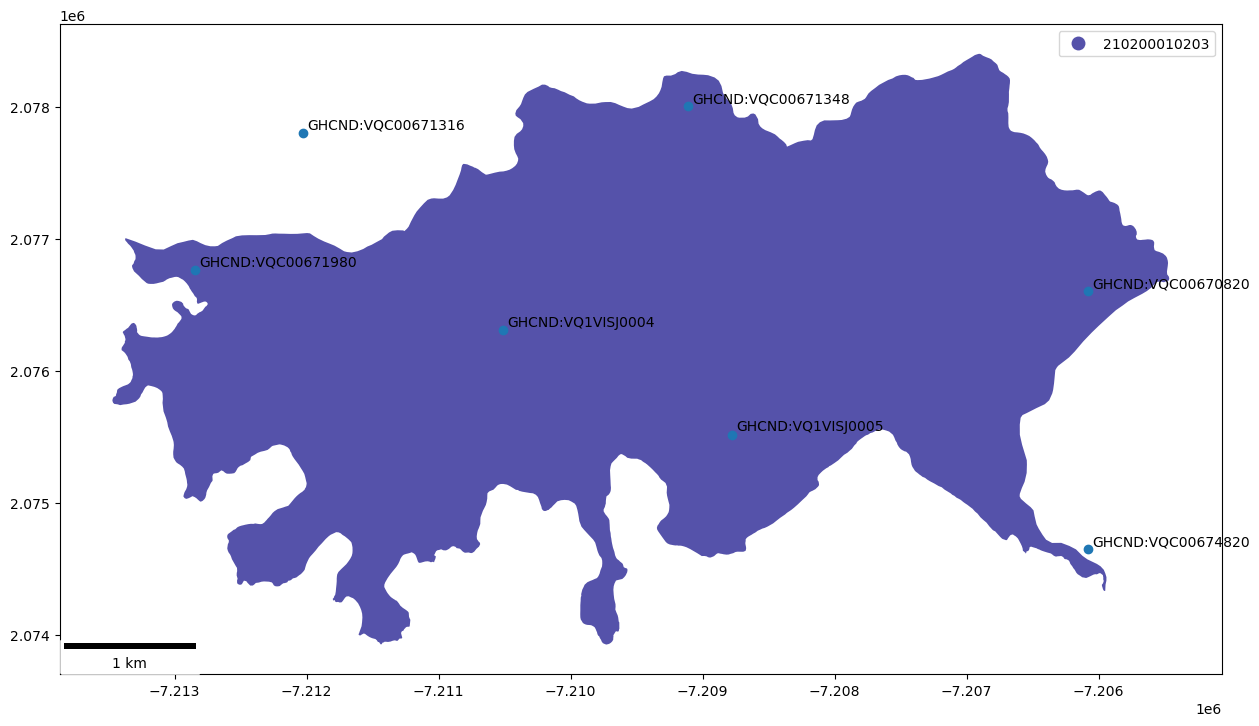

In [50]:
plot_rain_gages(hucs_gdf,rain_gage_gdf)

In [52]:
#user selected
rain_site = 'VQC00671980'
#write gage # to txt file for later notebooks
with open(home/'input'/'rain_gage.txt','w') as tfile:
    tfile.write(rain_site)

In [55]:
#download data
url = f"https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/{rain_site}.csv"
csv = download_file(url,home/'output')

In [56]:
daily_prcp = pd.read_csv(csv)
daily_prcp['PRCP_in'] = daily_prcp['PRCP']/(10*25.4)
daily_prcp['date_pd'] = daily_prcp['DATE'].apply(lambda x: pd.to_datetime(x))
daily_prcp.set_index('date_pd',inplace=True)

In [57]:
daily_prcp['year'] = daily_prcp['DATE'].apply(lambda x: x[:4])

In [58]:
annual_extreme = pd.DataFrame(daily_prcp.groupby('year')['PRCP_in'].max())

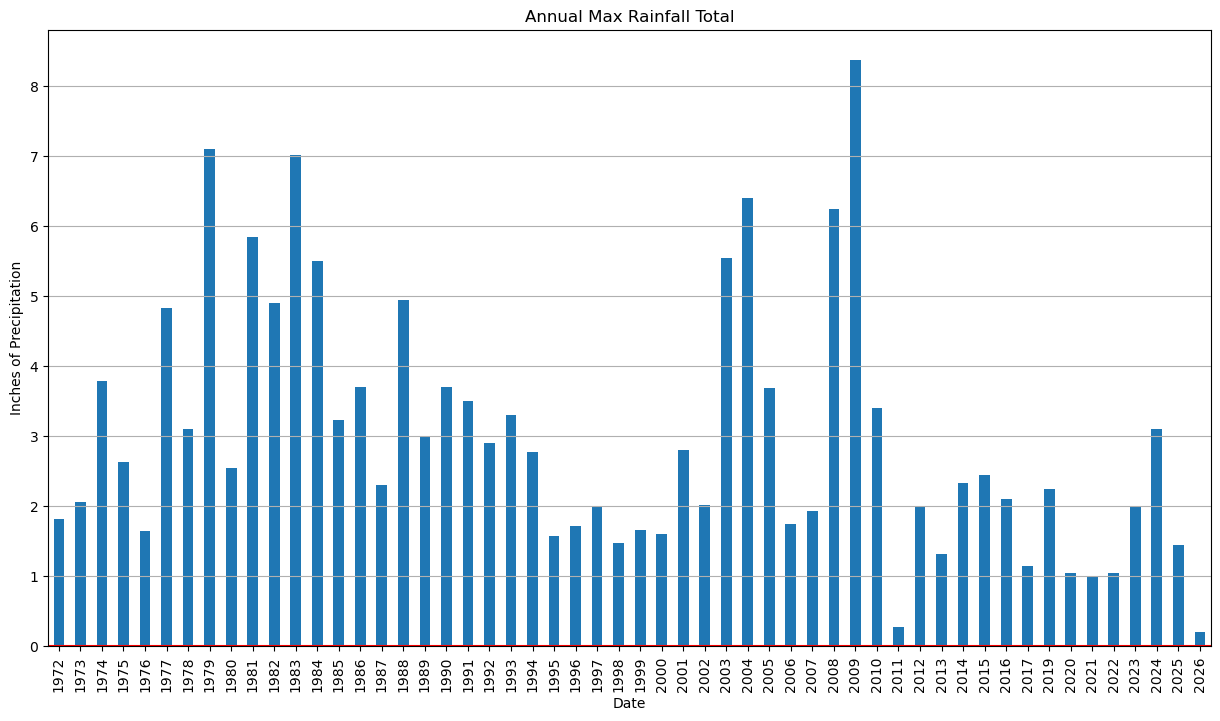

In [59]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.axhline(y=stormwater_capacity, color='r', linestyle='-')
annual_extreme.plot.bar(ax=ax,title='Annual Max Rainfall Total',xlabel='Date', ylabel='Inches of Precipitation',legend=False)
ax.grid(axis='y',linestyle='-')